<a href="https://colab.research.google.com/github/rulogar1234/nuclio-1/blob/develop/1er_entregable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importamos librería
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,MinMaxScaler

import folium
import plotly.express as px

In [ ]:
#leemos el fichero de renfe
df_bmw1=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/1stEntregable/bmw_pricing_v3.csv",sep=",")
df_bmw1.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


In [ ]:
#convertimos las fechas
for i in ["fecha_registro","fecha_venta"]:
    df_bmw1[i]=pd.to_datetime(df_bmw1[i])

In [ ]:
#borramos duplicados
df_bmw1=df_bmw1.drop_duplicates().copy(deep=True)

In [ ]:
#miramos que no hayan precios negativos o 0
df_bmw1[(df_bmw1['precio'] < 0)]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


In [ ]:
df_bmw1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   marca                        3873 non-null   object        
 1   modelo                       4840 non-null   object        
 2   km                           4841 non-null   float64       
 3   potencia                     4842 non-null   float64       
 4   fecha_registro               2420 non-null   datetime64[ns]
 5   tipo_gasolina                4838 non-null   object        
 6   color                        4398 non-null   object        
 7   tipo_coche                   3383 non-null   object        
 8   volante_regulable            4839 non-null   object        
 9   aire_acondicionado           4357 non-null   object        
 10  camara_trasera               4841 non-null   object        
 11  asientos_traseros_plegables  1452 non-null 

In [ ]:
#miramos los valores que tenemos en la marca
df_bmw1['marca'].unique()

array([nan, 'BMW'], dtype=object)

In [ ]:
#como la lista es de BMW, todos los coches suponemos que son BMW, borramos la columna
del df_bmw1['marca']

In [ ]:
#miramos cuantos registros tiene nuestro dataset
len(df_bmw1)

4843

In [ ]:
#miramos nulos
df_bmw1.isnull().sum()

modelo                            3
km                                2
potencia                          1
fecha_registro                 2423
tipo_gasolina                     5
color                           445
tipo_coche                     1460
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3391
elevalunas_electrico              2
bluetooth                       728
gps                               0
alerta_lim_velocidad            728
precio                            6
fecha_venta                       1
dtype: int64

In [ ]:
# al tener 4843 consideramos que se pueden borrar los registros que tengan menos de un 5% (24 registros) a nulo
columnas=df_bmw1.columns.tolist()
columnas_nulas=[]
for columna in columnas:
  if df_bmw1[columna].isnull().sum() < 25:
    columnas_nulas.append(columna)
    df_bmw1.dropna(subset=[columna], inplace=True)
columnas_nulas

['modelo',
 'km',
 'potencia',
 'tipo_gasolina',
 'volante_regulable',
 'camara_trasera',
 'elevalunas_electrico',
 'gps',
 'precio',
 'fecha_venta']

In [ ]:
df_bmw1.isnull().sum()

modelo                            0
km                                0
potencia                          0
fecha_registro                 2409
tipo_gasolina                     0
color                           442
tipo_coche                     1449
volante_regulable                 0
aire_acondicionado              482
camara_trasera                    0
asientos_traseros_plegables    3373
elevalunas_electrico              0
bluetooth                       725
gps                               0
alerta_lim_velocidad            725
precio                            0
fecha_venta                       0
dtype: int64

array([[<Axes: title={'center': 'precio'}>]], dtype=object)

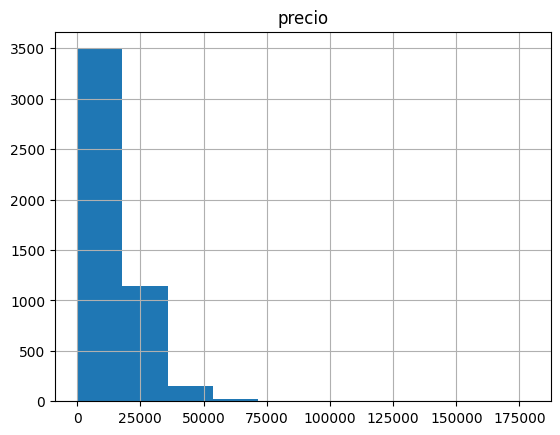

In [ ]:
#Verificamos outlayers de precio
df_bmw1.hist("precio")

In [ ]:
#miramos cuantos coches hay más altos de 70000 de precio
df_bmw1[df_bmw1['precio'] > 70000]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
90,i8,12402.0,170.0,NaT,hybrid_petrol,grey,coupe,True,True,False,False,False,False,False,True,95200.0,2018-04-01
2938,640 Gran Coupé,-64.0,230.0,NaT,diesel,black,sedan,True,True,False,NaN,False,False,True,True,75000.0,2018-04-01
4146,X6 M,2970.0,423.0,2016-04-01,petrol,red,suv,True,NaN,True,False,False,False,True,True,82400.0,2018-04-01
4684,X4,103222.0,140.0,2014-08-01,diesel,grey,suv,True,True,False,NaN,True,False,True,True,142800.0,2018-08-01
4731,X5 M,4530.0,230.0,2016-07-01,diesel,silver,suv,True,NaN,False,NaN,False,False,False,True,73100.0,2018-08-01
4753,X3,72515.0,135.0,2013-03-01,diesel,blue,suv,False,False,True,NaN,False,NaN,False,True,178500.0,2018-08-01


In [ ]:
#los borramos
df_bmw1=df_bmw1[df_bmw1['precio'] <= 70000]

array([[<Axes: title={'center': 'precio'}>]], dtype=object)

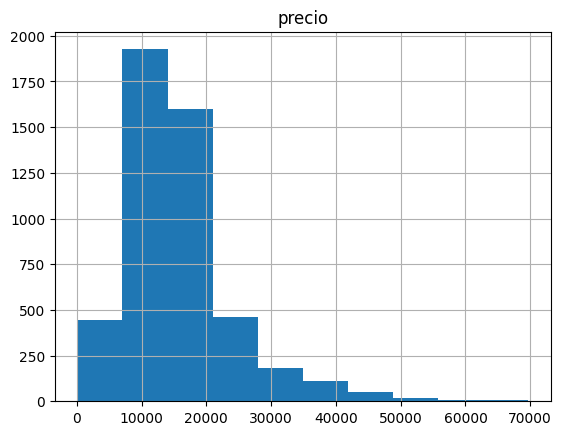

In [ ]:
#Verificamos outlayers de precio, quedando bastante normal
df_bmw1.hist("precio")

# ANALISIS **CATEGORICAS**

In [ ]:
#copiamos dataframe:
df_bmw2 = df_bmw1.copy()


In [ ]:
#Borramos la fecha de registro ya que consideramos que no va a ser importante para el cálculo del precio
del df_bmw2['fecha_registro']

In [ ]:
columnas=df_bmw2.columns.tolist()
columnas_nulas=[]
for columna in columnas:
  if df_bmw2[columna].isnull().sum() > 0:
    columnas_nulas.append(columna)
    print(df_bmw2[columna].unique())
columnas_nulas

['black' 'grey' 'white' 'red' 'silver' 'blue' nan 'orange' 'beige' 'brown'
 'green']
[nan 'convertible' 'coupe' 'estate' 'hatchback' 'sedan' 'subcompact' 'suv'
 'van']
[True False nan]
[nan False True]
[nan True False]
[nan True False]


['color',
 'tipo_coche',
 'aire_acondicionado',
 'asientos_traseros_plegables',
 'bluetooth',
 'alerta_lim_velocidad']

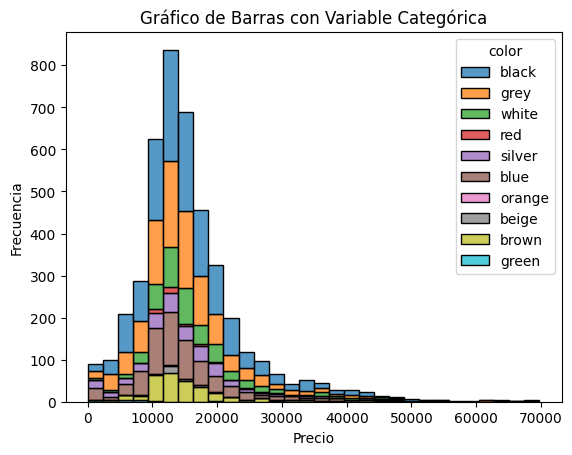

In [ ]:
#suponemos que los precios no dependen del color para poner un desconocido en color
# Crear un gráfico de barras
sns.histplot(data=df_bmw2, x='precio', hue='color',  bins=30, multiple = "stack")
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Gráfico de Barras con Variable Categórica')
plt.show()

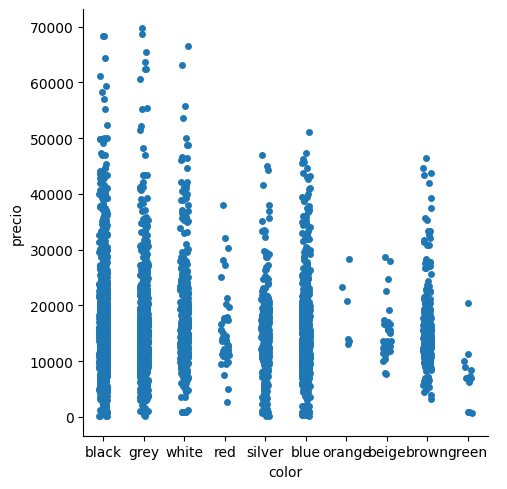

In [ ]:
sns.catplot(x = "color", y="precio", data= df_bmw2)

In [ ]:
 df_bmw2['color'].fillna('Desconocido', inplace=True)

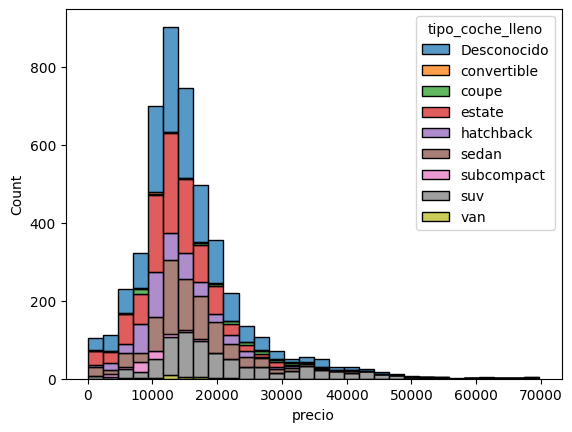

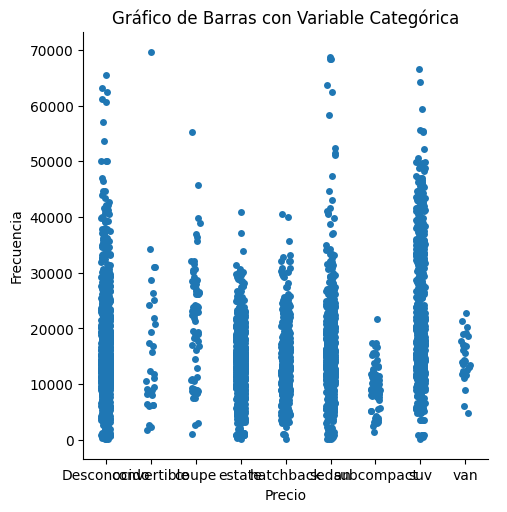

In [ ]:
#Verificamos que el precio sí depende del tipo de coche
df_bmw2['tipo_coche_lleno']= df_bmw2['tipo_coche'].fillna('Desconocido')

# Crear un gráfico de barras
sns.histplot(data=df_bmw2, x='precio', hue='tipo_coche_lleno',  bins=30, multiple = "stack")
sns.catplot(x = "tipo_coche_lleno", y="precio", data= df_bmw2)
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Gráfico de Barras con Variable Categórica')
plt.show()

del df_bmw2['tipo_coche_lleno']

In [ ]:
#Vamos a ver cuantos registros tienen más de 2, 3 o 4 campos a null, si son 3 o 4 los eliminamos

In [ ]:
columnas=df_bmw2.columns.tolist()
columnas_nulas=[]
for columna in columnas:
  if df_bmw2[columna].isnull().sum() > 0:
    columnas_nulas.append(columna)
    print(df_bmw2[columna].unique())
columnas_nulas

[nan 'convertible' 'coupe' 'estate' 'hatchback' 'sedan' 'subcompact' 'suv'
 'van']
[True False nan]
[nan False True]
[nan True False]
[nan True False]


['tipo_coche',
 'aire_acondicionado',
 'asientos_traseros_plegables',
 'bluetooth',
 'alerta_lim_velocidad']

In [ ]:
#empezamos por 5
df_bmw2[df_bmw2['tipo_coche'].isnull() & df_bmw2['aire_acondicionado'].isnull() & df_bmw2['asientos_traseros_plegables'].isnull() & df_bmw2['alerta_lim_velocidad'].isnull() & df_bmw2['bluetooth'].isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,log_precio


In [ ]:
len(df_bmw2)

4811

In [ ]:
#Borramos combinatoria de columnas de 4 valores nulos
from itertools import combinations
combinaciones = list(combinations(columnas_nulas, 4))
for combinacion in combinaciones:
    indices_eliminar=df_bmw2[df_bmw2[combinacion[0]].isnull() &  df_bmw2[combinacion[1]].isnull() &  df_bmw2[combinacion[2]].isnull() &  df_bmw2[combinacion[3]].isnull()].index
    df_bmw2.drop(indices_eliminar,inplace=True)

In [ ]:
len(df_bmw2)

4764

In [ ]:
#Borramos combinatoria de columnas de 3 valores nulos
from itertools import combinations
combinaciones = list(combinations(columnas_nulas, 3))
for combinacion in combinaciones:
    indices_eliminar=df_bmw2[df_bmw2[combinacion[0]].isnull() &  df_bmw2[combinacion[1]].isnull() &  df_bmw2[combinacion[2]].isnull()].index
    df_bmw2.drop(indices_eliminar,inplace=True)

In [ ]:
len(df_bmw2)

4329

In [ ]:
#volvemos a hacer recuento
df_bmw2.isnull().sum()

modelo                            0
km                                0
potencia                          0
tipo_gasolina                     0
color                             0
tipo_coche                     1086
volante_regulable                 0
aire_acondicionado              288
camara_trasera                    0
asientos_traseros_plegables    2916
elevalunas_electrico              0
bluetooth                       482
gps                               0
alerta_lim_velocidad            482
precio                            0
fecha_venta                       0
log_precio                        0
dtype: int64

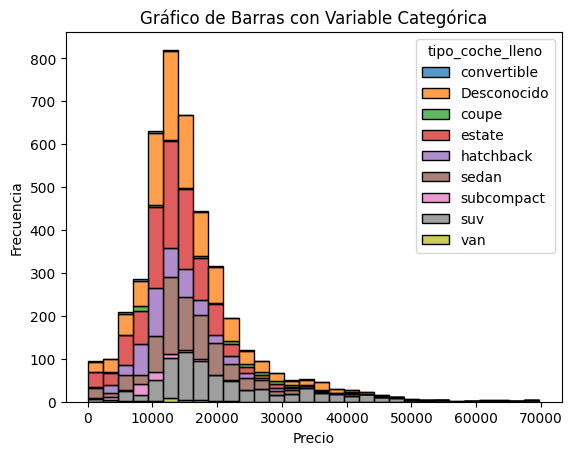

In [ ]:
#volvemos a hacer el histograma
df_bmw2['tipo_coche_lleno']= df_bmw2['tipo_coche'].fillna('Desconocido')

# Crear un gráfico de barras
sns.histplot(data=df_bmw2, x='precio', hue='tipo_coche_lleno',  bins=30, multiple = "stack")
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Gráfico de Barras con Variable Categórica')
plt.show()

del df_bmw2['tipo_coche_lleno']

In [ ]:
df_bmw2['tipo_coche'].fillna('Desconocido', inplace=True)

In [ ]:
df_bmw2['aire_acondicionado'].fillna('Desconocido', inplace=True)

In [ ]:
df_bmw2['asientos_traseros_plegables'].fillna('Desconocido', inplace=True)

In [ ]:
df_bmw2['bluetooth'].fillna('Desconocido', inplace=True)

In [ ]:
df_bmw2['alerta_lim_velocidad'].fillna('Desconocido', inplace=True)

In [ ]:
#volvemos a hacer recuento
df_bmw2.isnull().sum()

modelo                         0
km                             0
potencia                       0
tipo_gasolina                  0
color                          0
tipo_coche                     0
volante_regulable              0
aire_acondicionado             0
camara_trasera                 0
asientos_traseros_plegables    0
elevalunas_electrico           0
bluetooth                      0
gps                            0
alerta_lim_velocidad           0
precio                         0
fecha_venta                    0
log_precio                     0
dtype: int64

In [ ]:
df_bmw2.head()

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,log_precio
1,M4,13929.0,317.0,petrol,grey,convertible,True,True,False,Desconocido,False,True,True,True,69700.0,2018-02-01,4.843233
2,320,183297.0,120.0,diesel,white,Desconocido,False,False,False,Desconocido,True,False,True,False,10200.0,2018-02-01,4.008600
3,420,128035.0,135.0,diesel,red,convertible,True,True,False,Desconocido,True,True,True,Desconocido,25100.0,2018-02-01,4.399674
4,425,97097.0,160.0,diesel,silver,Desconocido,True,True,False,False,False,True,True,True,33400.0,2018-04-01,4.523746
5,335,152352.0,225.0,petrol,black,Desconocido,True,True,False,False,True,True,True,True,17100.0,2018-02-01,4.232996
